['L1.jpg', 'L10.jpg', 'L11.jpg', 'L12.jpg', 'L13.jpg', 'L14.jpg', 'L15.jpg', 'L16.jpg', 'L17.jpg', 'L18.jpg', 'L19.jpg', 'L2.jpg', 'L20.jpg', 'L21.jpg', 'L22.jpg', 'L23.jpg', 'L24.jpg', 'L25.jpg', 'L26.jpg', 'L27.jpg', 'L28.jpg', 'L29.jpg', 'L3.jpg', 'L30.jpg', 'L31.jpg', 'L32.jpg', 'L33.jpg', 'L34.jpg', 'L35.jpg', 'L36.jpg', 'L37.jpg', 'L38.jpg', 'L39.jpg', 'L4.jpg', 'L40.jpg', 'L41.jpg', 'L42.jpg', 'L43.jpg', 'L44.jpg', 'L45.jpg', 'L46.jpg', 'L47.jpg', 'L48.jpg', 'L49.jpg', 'L5.jpg', 'L50.jpg', 'L51.jpg', 'L52.jpg', 'L53.jpg', 'L54.jpg', 'L55.jpg', 'L56.jpg', 'L57.jpg', 'L58.jpg', 'L59.jpg', 'L6.jpg', 'L60.jpg', 'L61.jpg', 'L62.jpg', 'L63.jpg', 'L64.jpg', 'L65.jpg', 'L7.jpg', 'L8.jpg', 'L9.jpg']
base_300ppp/img_lange_300ppp/L1.jpg
(3408, 2464, 3) 25191936 8397312
data  {'filename': 'L1.jpg', 'output': 'L1.jpg_final.jpg', 'count': 0}
minThreshold:99 maxThreshold:200 blobColor:0 minArea:50 maxArea:300 minCircularity:0.7 minConvexity:0.7 minInertiaRatio:0.3 
nombre varroas détectés :  3

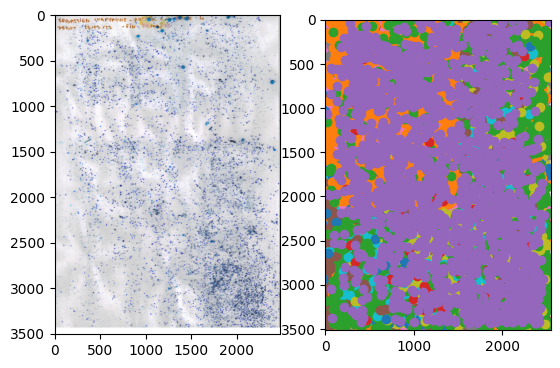

In [5]:
import sys,os,json  
import time
from time import sleep
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2) # create subplots
coor_crop = [] # liste des coordonnées des crops
compte_crop = [] # N° des crops

# folder= "./tmp/test/british_cat/"
# folder= "C:/Users/Bernard/Documents/Scan_300ppp/crop_a_tester/crops_22/"
# folder= "C:/Users/Bernard/Documents/Scan_300ppp/faire_crop/filtre_a_crop/"
# folder1= "C:/Users/Bernard/Documents/Scan_300ppp/faire_crop/filtre_a_crop_1/"
folder= 'base_300ppp/crop_44_300ppp/'
folder1= 'base_300ppp/crop_44_300ppp/'
folder0= 'base_300ppp/img_lange_300ppp/'
dim_crop = 40 # demi-largeur du crop 22 X 22

"""
try:    
    filename = sys.argv[1]
    name, ext = os.path.splitext(sys.argv[1])
    output = name + '_final' + ext
    data = {'filename': filename, 'output': output, 'count': 0}
    print("fichier:", filename)
    print("final:", output)
    print(json.dumps(data))
except IndexError:
    print("missing filename")
    sys.exit()
"""
# https://www.codetd.com/en/article/12003434	
#print ('type x,y,srcW,refW,srcH,refH', x,type(x),y,type(y),srcW,type(srcW),refW,type(refW),srcH,type(srcH),refH,type(refH))
def addWeightedSmallImgToLargeImg(largeImg,alpha,smallImg,beta,gamma=0.0,regionTopLeftPos=(0,0)):
	srcW, srcH = largeImg.shape[1::-1]
	refW, refH = smallImg.shape[1::-1]
	y,x =  regionTopLeftPos
	# print ('type x,y,srcW,refW,srcH,refH', x,type(x),y,type(y),srcW,type(srcW),refW,type(refW),srcH,type(srcH),refH,type(refH))
	if (refW>srcW) or (refH>srcH):
		#raise ValueError("img2's size must less than or equal to img1")
		raise ValueError(f"img2's size {smallImg.shape[1::-1]} must less than or equal to img1's size {largeImg.shape[1::-1]}")
	else:
		if (x+refW)>srcW:
			x = str(srcW-refW)
		if (y+refH)>srcH:
			y = str(srcH-refH)
		destImg = np.array(largeImg)
		x1 = int(x)
		y1 = int(y)
		x2 = int(x)+refW
		y2 = int(y)+refH
		tmpSrcImg = destImg[y1:y2,x1:x2]
		tmpImg = cv2.addWeighted(tmpSrcImg, alpha, smallImg, beta,gamma)
		destImg[y1:y2,x1:x2] = tmpImg
		return destImg
def mon_resize (image,taille):
	width = int(image.shape[1] * taille / 100)
	height = int(image.shape[0] * taille / 100)
	dsize = (width, height)	
	output = cv2.resize(image, dsize)
	return output

def insertion(points,compte_crop,ou_pas,h1,cpt) : 
    # insertion dans la page "blanche" des découpes de l'image d'origine autour des varroas détectés 
    # https://stackoverflow.com/questions/35884409/how-to-extract-x-y-coordinates-from-opencv-cv2-keypoint-object/35884644
    # RETREIVE KEYPOINTS COORDINATES AND DRAW MANUALLY
    # création d'une page blanche
    data['image_height'] = workingImage.shape[0]
    data['image_width'] = workingImage.shape[1]
    page_blanche = np.zeros((data['image_height'],data['image_width'],3), np.uint8) # fabrication de la page
    page_blanche.fill(255)  # remplit l'image de la couleur blanche
    pas_insertion = 0   
    # h1 = 11 # demi-largeur du crop
    srcW, srcH = page_blanche.shape[1::-1]  # taille de l'image 
    # print('points', points) # liste des coordonnées des varroas détectés
    for point  in points:  # on balaye la liste des varroas détectés : y=point[0] , x =point[1]
        # print('position du varroa detecte y,x : ',point)
        b1 = int(point[0]-h1) # coin à gauche 
        if (b1<0) :
            pas_insertion = 1
        b2 = int(point[0]+h1) # coin à droite
        if (b2>srcW) :
            pas_insertion = 1			
        a1 = int(point[1]-h1) # coin en haut
        if (a1<0) :
            pas_insertion = 1
        a2 = int(point[1]+h1) # coin en bas
        if (a2>srcH) :
            pas_insertion = 1
        if (pas_insertion == 0 ) :
            # print('taille du crop : ',b1,b2,a1,a2)	
            crop_img = workingImage[a1:a2,b1:b2] # découpage d'un carré 2h1x2h1 de l'image d'origine autour du varroa détecté         
            if (ou_pas > 1) :
                    if crop_img is None : 
                        result = "crop_img is empty!!"
                    else :
                        # création de l'image positive 
                        cpt = cpt + 1
                        name_crop = 'base_300ppp/'+s_nom_fichier[:-4]+'_crop_44_' + '_' + str (b1).zfill(4) +'_'+ str(a1).zfill(4)+'.jpg'
                        print("name_crop ",name_crop," taille de la feuille srcW, srcH ", srcW, srcH , "b1,b2 ", b1,b2," a1,a2 ",a1,a2)
                        # cv2.imshow('image_blob',crop_img) # imprime la page sur l'écran
                        cv2.imwrite(name_crop,crop_img) # écrit le crop sur disque !!!
                        compte_crop +=1
            y = int(point[0]) - h1 # point d'insertion en y
            x = int(point[1]) - h1 # point d'insertion en x
            # print('point insertion y,x : ',y,x,type(y),type(x))			
            # maintenant on insert la découpe h1xh1 autour du varroa de l'image d'origine dans une page blanche
            # !! inversion y,x en x,y !!!
            #page_blanche = addWeightedSmallImgToLargeImg(page_blanche, 0.01, crop_img, 1,regionTopLeftPos=(x,y))	
            # !! inversion y,x en x,y !!!
            coor_crop = [x,y]
    print (" Nb de Varroas inserrés   ", cpt)
   

        
    return page_blanche # image blanche avec les insertions des varroas détectés

def analyse(filename,parameters,image,compte_crop): 
    # méthode du "Blob Vincent-Fabrice-Jody"
    a,b,c,d,e,f,g,h=parameters # paramètres du blob
    print(f'minThreshold:{a} maxThreshold:{b} blobColor:{c} minArea:{d} maxArea:{e} minCircularity:{f} minConvexity:{g} minInertiaRatio:{h} ')
    params = cv2.SimpleBlobDetector_Params()
    params.minThreshold = a          #  = 15   #  original 10
    params.maxThreshold = b          #  = 180  #  original 200
    params.filterByColor  = True
    params.blobColor  = c            # blobColor = 0 sombre / blobColor = 255 clair
    params.filterByArea = True
    params.minArea = d               #  23 mais avec une marge  50
    params.maxArea = e               # 120 mais avec marge     150
    params.filterByCircularity = True
    params.minCircularity = f        # params.minCircularity = 0.1
    params.filterByConvexity = True
    params.minConvexity = g          # params.minConvexity = 0.69
    params.filterByInertia = True
    params.minInertiaRatio = h       # params.minInertiaRatio = 0.52

    detector = cv2.SimpleBlobDetector_create(params) # création du blob
    # print(f'A:{a} B:{b} C:{c} D:{d} E:{e} F:{f} G:{g} H:{h} ')
    g1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    keyPoints = detector.detect(g1) # détection des varroas par le blob

    nb_varroas=len(keyPoints) # nombre varroas détectés
    print('nombre varroas détectés : ',nb_varroas)  
    # marquage des varroas détectés par un cercle rouge 
    im_with_keypoints = cv2.drawKeypoints(image, keyPoints, np.array([]), (0, 0, 255),
                                        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                                        
    ax1.imshow(im_with_keypoints) # plot des points détectés

    pts = np.asarray([[p.pt[0], p.pt[1]] for p in keyPoints])
    # print('  pts : ',pts)
    cols = pts[:,0]
    rows = pts[:,1]
    # h1 = pts.size/2 # demi-largeur du crop autour du varroa : pas terrible !!!
    ax2.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax2.scatter(cols, rows) # création d'une image avec le nuage de points des varroas détectés
    ou_pas=2 # création des images positives pour la cascade de Haar

    cpt_insertion = 0 # compteur d'insertion de fichier
    blank_image = insertion (pts,compte_crop,ou_pas,dim_crop/2,cpt_insertion) # création d'une page blanche et insertion des varroas détectés 
    
    
    #cv2.imwrite('final_blank_image.jpg',blank_image)     # ecrit le fichier  sur le disque 
    output= mon_resize(blank_image,25) # retaille la page à 25% 
    #cv2.imshow('image_blob',output) # imprime la page sur l'écran
    #cv2.waitKey(0) # stop l'éxécution
    return nb_varroas,im_with_keypoints,blank_image 

# passage avec les paramètres du "blob : Vincent-Fabrice-Jody" 
minThreshold = 99       # 99 33
maxThreshold = 200      # 168 200
blobColor = 0           # 0
minArea = 50            # 117 35
maxArea = 300           # 134 150
minCircularity = 0.4    # 0.8 0.66
minConvexity = 0.7      # 0.7
minInertiaRatio = 0.3 # 0.4
parameters_blob=(minThreshold,maxThreshold,blobColor,minArea,maxArea,minConvexity,minConvexity,minInertiaRatio)

# programme principale 

# workingImage = cv2.imread(filename)  # image d'origine 

image_names=os.listdir(folder0) # folder0= "E:/scan_17_01_2023/scans_originaux/"    
print(image_names)
for filename in image_names:
    fname = folder0+filename
    print (fname)
    workingImage = cv2.imread(fname)  # image d'origine    
    aa=workingImage.size
    bb=workingImage.shape[1]*workingImage.shape[0]
    print(workingImage.shape, aa ,bb)

    output = filename + '_final' + '.jpg'
    data = {'filename': filename, 'output': output, 'count': 0}
    print ('data ' , data)
    s_nom_fichier = filename
    # affichage de l'image d'origine retaillée 
    output= mon_resize(workingImage,25) # retaille la page à 25% pour l'affichage
    cv2.imshow(filename,output) # affiche la page sur l'écran 
    cv2.waitKey(0) # stop l'éxécution   

    compte_crop_1 = 0 # pour le décompte de la sauvegarde des crops
    Image_0 = workingImage.copy() # on garde l'image de départ intact


    for filename in os.listdir(folder) :  # pour vider le répertoire folder
        os.remove(folder + filename)

    # Recherche du blob : "Vincent-Fabrice-Jody" dans Image_1  => "def analyse"
    nbVarroas,im_with_keypoints,Image_2 = analyse(s_nom_fichier,parameters_blob,Image_0,compte_crop_1)